In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df = pd.read_csv("./dados/properati-BR-2016-11-01-properties-sell.csv", encoding="utf8")

In [3]:
# df = df.sample(frac=0.10)

In [6]:
# df['place_with_parent_names']
df = df.query('place_with_parent_names.str.contains("Brasília")', engine="python")

In [14]:
df.shape

(1644, 25)

In [15]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,cidade
0,2013-12-05,sell,store,Zona Industrial,|Brasil|Distrito Federal|Brasília|Zona Industr...,NaN,NaN,NaN,NaN,4200000.0,...,NaN,NaN,NaN,4.0,NaN,http://zona-industrial.properati.com.br/8l3n_v...,"Otimo Imovel com o melhor valor da regiao, con...",Prédio Comercial/residencial Em Brasilia,https://thumbs-cf.properati.com/1/PbxySqWzc_xR...,Zona Industrial
1,2013-12-06,sell,house,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,NaN,NaN,NaN,NaN,1000000.0,...,NaN,NaN,NaN,4.0,NaN,http://guara-ii.properati.com.br/982p_vender_c...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Guara,NaN,Guará II
2,2013-12-06,sell,apartment,Taguatinga Norte,|Brasil|Distrito Federal|Brasília|Taguatinga N...,NaN,NaN,NaN,NaN,46000.0,...,NaN,NaN,NaN,2.0,NaN,http://taguatinga-norte.properati.com.br/9a1r_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Taguatinga,https://thumbs-cf.properati.com/0/Z_3YQcNiG5St...,Taguatinga Norte
3,2013-12-06,sell,apartment,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,NaN,NaN,NaN,NaN,483140.0,...,NaN,NaN,NaN,3.0,NaN,http://guara-ii.properati.com.br/9a1s_vender_a...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Guara,https://thumbs-cf.properati.com/9/vPkS8HO_zi51...,Guará II
4,2013-12-06,sell,apartment,Taguatinga Sul,|Brasil|Distrito Federal|Brasília|Taguatinga Sul|,NaN,NaN,NaN,NaN,55000.0,...,NaN,NaN,NaN,1.0,NaN,http://taguatinga-sul.properati.com.br/9a1w_ve...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Taguatinga,https://thumbs-cf.properati.com/7/uXcQJ8KfXo-r...,Taguatinga Sul


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, 2602 to 868563
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  1644 non-null   object 
 1   operation                   1644 non-null   object 
 2   property_type               1644 non-null   object 
 3   place_name                  1644 non-null   object 
 4   place_with_parent_names     1644 non-null   object 
 5   geonames_id                 0 non-null      float64
 6   lat-lon                     1109 non-null   object 
 7   lat                         1109 non-null   float64
 8   lon                         1109 non-null   float64
 9   price                       1575 non-null   float64
 10  currency                    1573 non-null   object 
 11  price_aprox_local_currency  1575 non-null   float64
 12  price_aprox_usd             1575 non-null   float64
 13  surface_total_in_m2         525 n

In [7]:
# pega somente a cidade
df.loc[:, "cidade"] = df["place_with_parent_names"].str.split("|", expand=True)[4]
df.tail()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,cidade
868559,2016-10-29,sell,apartment,Quadras Econômicas Lúcio Costa,|Brasil|Distrito Federal|Brasília|Quadras Econ...,NaN,NaN,NaN,NaN,270000.0,...,1239.027647,3970.588235,NaN,NaN,350.0,http://quadras-economicas-lucio-costa.properat...,"EPTG QE 03 - LÚCIO COSTA Apartamento vazado, c...","Apartamento residencial à venda, Quadras Econô...",https://thumbs-cf.properati.com/3/YEMQNZJVpGAN...,Quadras Econômicas Lúcio Costa
868560,2016-10-29,sell,house,Taguatinga Sul,|Brasil|Distrito Federal|Brasília|Taguatinga Sul|,NaN,NaN,NaN,NaN,1150000.0,...,944.366132,3026.315789,NaN,NaN,NaN,http://taguatinga-sul.properati.com.br/2hefq_v...,QSB 9 - TAGUATINGA Casa composta por (03) quar...,"Casa residencial à venda, Taguatinga Sul, Tag...",https://thumbs-cf.properati.com/5/0XNpzAcZqj7_...,Taguatinga Sul
868561,2016-10-29,sell,house,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,NaN,NaN,NaN,NaN,450000.0,...,877.644625,2812.500000,NaN,NaN,NaN,http://guara-ii.properati.com.br/2hefu_venda_c...,"QE 32 - Guará II Casa térrea, original compost...","Casa residencial à venda, Guará II, Guará - CA...",https://thumbs-cf.properati.com/6/sntN84h0MV1u...,Guará II
868562,2016-10-29,sell,apartment,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,NaN,NaN,NaN,NaN,315000.0,...,1638.269833,5250.000000,NaN,NaN,350.0,http://guara-ii.properati.com.br/2heg0_venda_a...,"QI 23 - Res Guara Nobre Apartamento com 60,30m...","Venda, 02 quartos, 01 reversível, 01 vaga de g...",https://thumbs-cf.properati.com/6/04M8LUiZhNsL...,Guará II
868563,2016-10-29,sell,house,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,"-15.905274,-47.918751",-15.905274,-47.918751,1250000.0,...,1026.484947,3289.473684,NaN,NaN,NaN,http://brasilia-distrito-federal.properati.com...,SMPW QD 25 - PARK WAY Excelente casa em lote d...,"Casa residencial à venda, Park Way, Brasília.",https://thumbs-cf.properati.com/8/m0J_2DK7B1i7...,


In [16]:
df.shape

(1644, 25)

In [ ]:
# df['cidade']

In [8]:
df.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,0.0,1109.000000,1109.000000,1.575000e+03,1.575000e+03,1.575000e+03,525.000000,1235.000000,1191.000000,1.191000e+03,56.000000,528.000000,186.000000
mean,NaN,-16.320760,-47.743585,7.303667e+05,7.330549e+05,2.291799e+05,338.137143,315.390283,4087.562204,1.297567e+04,4.678571,2.119318,2270.543011
std,NaN,2.513124,4.087788,8.014542e+05,8.051404e+05,2.517165e+05,2233.328883,1813.166131,41765.511403,1.323203e+05,4.217311,1.323760,25635.312498
min,NaN,-30.000000,-51.081474,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,8.528102,2.732916e+01,1.000000,1.000000,4.000000
25%,NaN,-15.855254,-48.030015,2.800000e+05,2.794757e+05,8.737439e+04,0.000000,54.000000,1126.852347,3.608834e+03,1.000000,1.000000,280.000000
50%,NaN,-15.826304,-47.915817,4.400000e+05,4.424259e+05,1.383186e+05,53.000000,78.000000,1698.507722,5.407000e+03,3.500000,2.000000,380.000000
75%,NaN,-15.784989,-47.883827,8.513785e+05,8.581560e+05,2.682911e+05,129.000000,160.000000,2664.093145,8.447213e+03,6.000000,3.000000,460.000000
max,NaN,15.876708,48.086232,8.000000e+06,8.076763e+06,2.525093e+06,40000.000000,24217.000000,946909.915000,3.000000e+06,17.000000,9.000000,350000.000000


In [9]:
# examinando nulos
df.isnull().sum()

created_on                       0
operation                        0
property_type                    0
place_name                       0
place_with_parent_names          0
geonames_id                   1644
lat-lon                        535
lat                            535
lon                            535
price                           69
currency                        71
price_aprox_local_currency      69
price_aprox_usd                 69
surface_total_in_m2           1119
surface_covered_in_m2          409
price_usd_per_m2               453
price_per_m2                   453
floor                         1588
rooms                         1116
expenses                      1458
properati_url                    0
description                      0
title                            0
image_thumbnail                 15
cidade                           0
dtype: int64

In [10]:
df.to_csv("./dados/kaggle_imoveis_somente_brasilia.csv", index=False)

In [11]:
df = pd.read_csv("./dados/kaggle_imoveis_somente_brasilia.csv")
df.tail()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,cidade
1639,2016-10-29,sell,apartment,Quadras Econômicas Lúcio Costa,|Brasil|Distrito Federal|Brasília|Quadras Econ...,NaN,NaN,NaN,NaN,270000.0,...,1239.027647,3970.588235,NaN,NaN,350.0,http://quadras-economicas-lucio-costa.properat...,"EPTG QE 03 - LÚCIO COSTA Apartamento vazado, c...","Apartamento residencial à venda, Quadras Econô...",https://thumbs-cf.properati.com/3/YEMQNZJVpGAN...,Quadras Econômicas Lúcio Costa
1640,2016-10-29,sell,house,Taguatinga Sul,|Brasil|Distrito Federal|Brasília|Taguatinga Sul|,NaN,NaN,NaN,NaN,1150000.0,...,944.366132,3026.315789,NaN,NaN,NaN,http://taguatinga-sul.properati.com.br/2hefq_v...,QSB 9 - TAGUATINGA Casa composta por (03) quar...,"Casa residencial à venda, Taguatinga Sul, Tag...",https://thumbs-cf.properati.com/5/0XNpzAcZqj7_...,Taguatinga Sul
1641,2016-10-29,sell,house,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,NaN,NaN,NaN,NaN,450000.0,...,877.644625,2812.500000,NaN,NaN,NaN,http://guara-ii.properati.com.br/2hefu_venda_c...,"QE 32 - Guará II Casa térrea, original compost...","Casa residencial à venda, Guará II, Guará - CA...",https://thumbs-cf.properati.com/6/sntN84h0MV1u...,Guará II
1642,2016-10-29,sell,apartment,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,NaN,NaN,NaN,NaN,315000.0,...,1638.269833,5250.000000,NaN,NaN,350.0,http://guara-ii.properati.com.br/2heg0_venda_a...,"QI 23 - Res Guara Nobre Apartamento com 60,30m...","Venda, 02 quartos, 01 reversível, 01 vaga de g...",https://thumbs-cf.properati.com/6/04M8LUiZhNsL...,Guará II
1643,2016-10-29,sell,house,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,"-15.905274,-47.918751",-15.905274,-47.918751,1250000.0,...,1026.484947,3289.473684,NaN,NaN,NaN,http://brasilia-distrito-federal.properati.com...,SMPW QD 25 - PARK WAY Excelente casa em lote d...,"Casa residencial à venda, Park Way, Brasília.",https://thumbs-cf.properati.com/8/m0J_2DK7B1i7...,NaN


In [ ]:
df.drop(columns=["geonames_id"], inplace=True)

In [ ]:
#
df.query("rooms.notna()", engine="python")[:1]

,created_on,operation,property_type,place_name,place_with_parent_names,lat-lon,lat,lon,price,currency,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,cidade
0,2013-12-05,sell,store,Zona Industrial,|Brasil|Distrito Federal|Brasília|Zona Industr...,NaN,NaN,NaN,4200000.0,BRL,...,NaN,NaN,NaN,4.0,NaN,http://zona-industrial.properati.com.br/8l3n_v...,"Otimo Imovel com o melhor valor da regiao, con...",Prédio Comercial/residencial Em Brasilia,https://thumbs-cf.properati.com/1/PbxySqWzc_xR...,Zona Industrial


In [ ]:
# sem andar considera 1o andar
df["floor"] = df["floor"].fillna(1)

In [ ]:
df["cidade"] = df["cidade"].fillna("Brasília")

In [ ]:
df.isnull().sum()

created_on                       0
operation                        0
property_type                    0
place_name                       0
place_with_parent_names          0
lat-lon                        535
lat                            535
lon                            535
price                           69
currency                        71
price_aprox_local_currency      69
price_aprox_usd                 69
surface_total_in_m2           1119
surface_covered_in_m2          409
price_usd_per_m2               453
price_per_m2                   453
floor                            0
rooms                         1116
expenses                      1458
properati_url                    0
description                      0
title                            0
image_thumbnail                 15
cidade                           0
dtype: int64

In [ ]:
# dropa mais algumas colunas
df.drop(
    columns=["image_thumbnail", "properati_url", "lat-lon", "lat", "lon"], inplace=True
)

In [ ]:
df.drop(columns=["expenses"], inplace=True)

In [ ]:
# examinando nulos
df.isnull().sum()

created_on                       0
operation                        0
property_type                    0
place_name                       0
place_with_parent_names          0
price                           69
currency                        71
price_aprox_local_currency      69
price_aprox_usd                 69
surface_total_in_m2           1119
surface_covered_in_m2          409
price_usd_per_m2               453
price_per_m2                   453
floor                            0
rooms                         1116
description                      0
title                            0
cidade                           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  1644 non-null   object 
 1   operation                   1644 non-null   object 
 2   property_type               1644 non-null   object 
 3   place_name                  1644 non-null   object 
 4   place_with_parent_names     1644 non-null   object 
 5   price                       1575 non-null   float64
 6   currency                    1573 non-null   object 
 7   price_aprox_local_currency  1575 non-null   float64
 8   price_aprox_usd             1575 non-null   float64
 9   surface_total_in_m2         525 non-null    float64
 10  surface_covered_in_m2       1235 non-null   float64
 11  price_usd_per_m2            1191 non-null   float64
 12  price_per_m2                1191 non-null   float64
 13  floor                       1644 

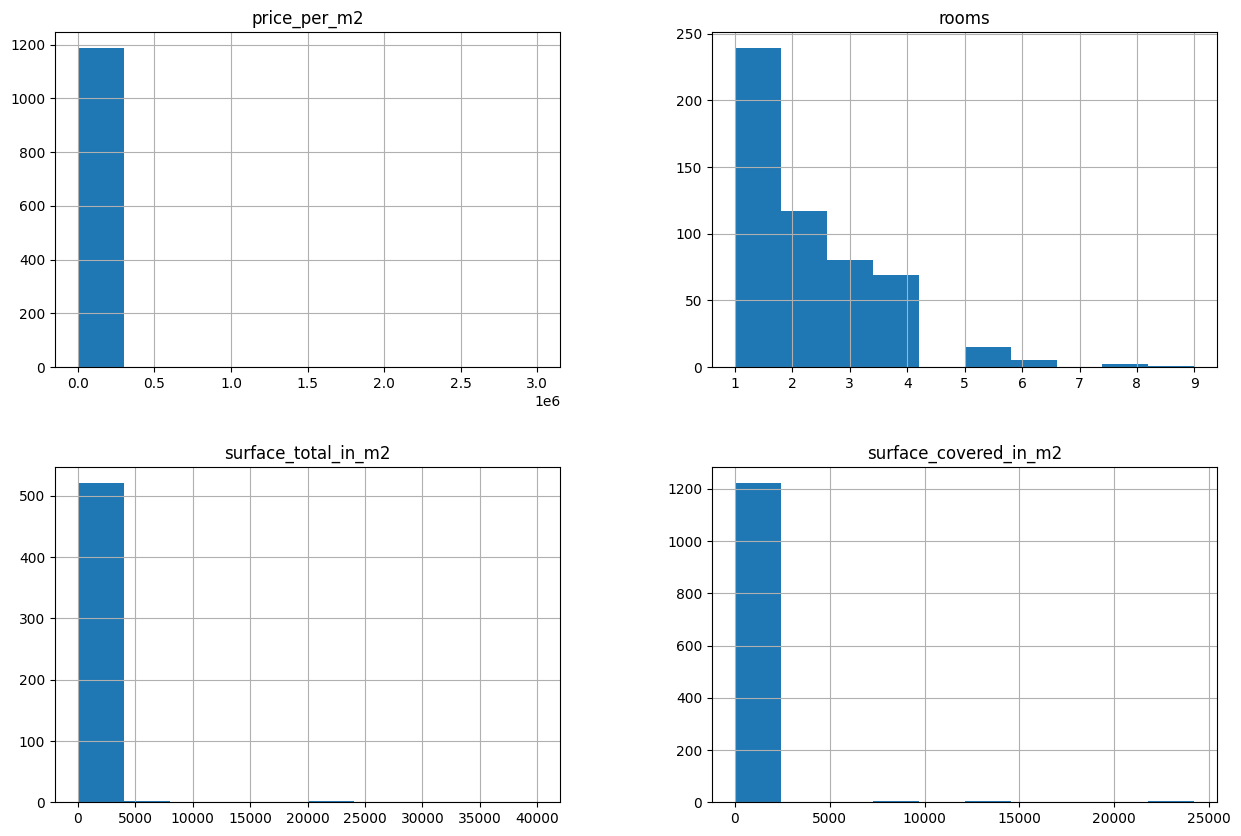

In [ ]:
colunas = ["price_per_m2", "rooms", "surface_total_in_m2", "surface_covered_in_m2"]
df.loc[:, colunas].hist(figsize=(15, 10))
plt.show()

price_per_m2
rooms
surface_total_in_m2


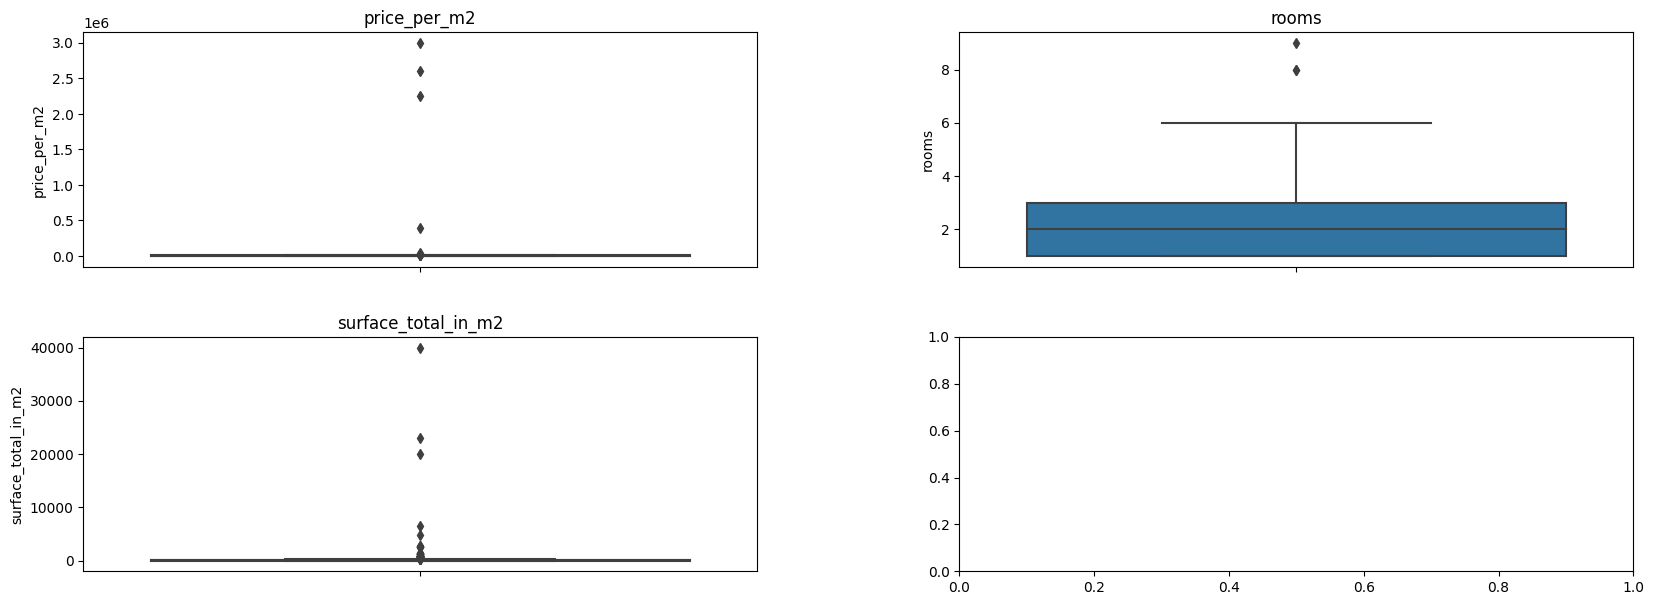

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axs = axs.ravel()

for i in range(len(axs) - 1):
    print(colunas[i])
    sns.boxplot(y=colunas[i], data=df, ax=axs[i], showfliers=True)
    axs[i].set_title(colunas[i])
plt.show()

In [ ]:
df = df.query("rooms < 7")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 1638
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  525 non-null    object 
 1   operation                   525 non-null    object 
 2   property_type               525 non-null    object 
 3   place_name                  525 non-null    object 
 4   place_with_parent_names     525 non-null    object 
 5   price                       519 non-null    float64
 6   currency                    517 non-null    object 
 7   price_aprox_local_currency  519 non-null    float64
 8   price_aprox_usd             519 non-null    float64
 9   surface_total_in_m2         88 non-null     float64
 10  surface_covered_in_m2       469 non-null    float64
 11  price_usd_per_m2            467 non-null    float64
 12  price_per_m2                467 non-null    float64
 13  floor                       525 no

In [ ]:
df.dropna(how="all")

,created_on,operation,property_type,place_name,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title,cidade
0,2013-12-05,sell,store,Zona Industrial,|Brasil|Distrito Federal|Brasília|Zona Industr...,4200000.0,BRL,4192136.27,1310615.98,NaN,NaN,NaN,NaN,1.0,4.0,"Otimo Imovel com o melhor valor da regiao, con...",Prédio Comercial/residencial Em Brasilia,Zona Industrial
1,2013-12-06,sell,house,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,1000000.0,BRL,998127.67,312051.42,NaN,NaN,NaN,NaN,1.0,4.0,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Guara,Guará II
2,2013-12-06,sell,apartment,Taguatinga Norte,|Brasil|Distrito Federal|Brasília|Taguatinga N...,46000.0,BRL,45913.85,14354.36,NaN,NaN,NaN,NaN,1.0,2.0,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Taguatinga,Taguatinga Norte
3,2013-12-06,sell,apartment,Guará II,|Brasil|Distrito Federal|Brasília|Guará II|,483140.0,BRL,482235.39,150764.52,NaN,NaN,NaN,NaN,1.0,3.0,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Guara,Guará II
4,2013-12-06,sell,apartment,Taguatinga Sul,|Brasil|Distrito Federal|Brasília|Taguatinga Sul|,55000.0,BRL,54896.99,17162.82,NaN,NaN,NaN,NaN,1.0,1.0,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Taguatinga,Taguatinga Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,2016-10-23,sell,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,850000.0,BRL,848408.53,265243.71,NaN,74.0,3584.374459,11486.486486,1.0,1.0,"Apartamento residencial à venda, Noroeste, Bra...","Apartamento residencial à venda, Noroeste, Bra...",Brasília
1542,2016-10-23,sell,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,520000.0,BRL,519026.39,162266.74,NaN,65.0,2496.411385,8000.000000,1.0,1.0,"Apartamento Duplex residencial à venda, Lago N...","Apartamento Duplex residencial à venda, Lago N...",Brasília
1543,2016-10-23,sell,house,Taguatinga Norte,|Brasil|Distrito Federal|Brasília|Taguatinga N...,500000.0,BRL,499063.83,156025.71,NaN,80.0,1950.321375,6250.000000,1.0,1.0,QNE 13 - TAGUATINGA Com uma ótima localização ...,"Casa residencial à venda, Taguatinga Norte, Ta...",Taguatinga Norte
1634,2016-10-28,sell,apartment,Parque Brasília,|Brasil|São Paulo|Campinas|Parque Brasília|,300000.0,BRL,299438.28,93615.42,60.0,NaN,NaN,NaN,1.0,2.0,"Excelente apartamento com 2 dormitorios, send...",Apartamento à Venda em Parque Brasília,Parque Brasília


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 1638
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  525 non-null    object 
 1   operation                   525 non-null    object 
 2   property_type               525 non-null    object 
 3   place_name                  525 non-null    object 
 4   place_with_parent_names     525 non-null    object 
 5   price                       519 non-null    float64
 6   currency                    517 non-null    object 
 7   price_aprox_local_currency  519 non-null    float64
 8   price_aprox_usd             519 non-null    float64
 9   surface_total_in_m2         88 non-null     float64
 10  surface_covered_in_m2       469 non-null    float64
 11  price_usd_per_m2            467 non-null    float64
 12  price_per_m2                467 non-null    float64
 13  floor                       525 no

In [ ]:
df.drop(
    columns=[
        "created_on",
        "operation",
        "price_aprox_local_currency",
        "price_aprox_usd",
        "surface_total_in_m2",
        "price_usd_per_m2",
    ],
    inplace=True,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 1638
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            525 non-null    object 
 1   place_name               525 non-null    object 
 2   place_with_parent_names  525 non-null    object 
 3   price                    519 non-null    float64
 4   currency                 517 non-null    object 
 5   surface_covered_in_m2    469 non-null    float64
 6   price_per_m2             467 non-null    float64
 7   floor                    525 non-null    float64
 8   rooms                    525 non-null    float64
 9   description              525 non-null    object 
 10  title                    525 non-null    object 
 11  cidade                   525 non-null    object 
dtypes: float64(5), object(7)
memory usage: 53.3+ KB


In [ ]:
df.isnull().sum()

property_type               0
place_name                  0
place_with_parent_names     0
price                       6
currency                    8
surface_covered_in_m2      56
price_per_m2               58
floor                       0
rooms                       0
description                 0
title                       0
cidade                      0
dtype: int64

In [ ]:
df.tail()

,property_type,place_name,place_with_parent_names,price,currency,surface_covered_in_m2,price_per_m2,floor,rooms,description,title,cidade
1541,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,850000.0,BRL,74.0,11486.486486,1.0,1.0,"Apartamento residencial à venda, Noroeste, Bra...","Apartamento residencial à venda, Noroeste, Bra...",Brasília
1542,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,520000.0,BRL,65.0,8000.000000,1.0,1.0,"Apartamento Duplex residencial à venda, Lago N...","Apartamento Duplex residencial à venda, Lago N...",Brasília
1543,house,Taguatinga Norte,|Brasil|Distrito Federal|Brasília|Taguatinga N...,500000.0,BRL,80.0,6250.000000,1.0,1.0,QNE 13 - TAGUATINGA Com uma ótima localização ...,"Casa residencial à venda, Taguatinga Norte, Ta...",Taguatinga Norte
1634,apartment,Parque Brasília,|Brasil|São Paulo|Campinas|Parque Brasília|,300000.0,BRL,NaN,NaN,1.0,2.0,"Excelente apartamento com 2 dormitorios, send...",Apartamento à Venda em Parque Brasília,Parque Brasília
1638,apartment,Samambaia Sul,|Brasil|Distrito Federal|Brasília|Samambaia Sul|,235000.0,BRL,55.0,4272.727273,1.0,1.0,QN 514 - Residencial Ravelo Excelente Oportuni...,Exc. Oportunidade Ap. 2 Q. 2 Vagas Cobertas !,Samambaia Sul


In [ ]:
df.drop(columns=["currency"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 1638
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            525 non-null    object 
 1   place_name               525 non-null    object 
 2   place_with_parent_names  525 non-null    object 
 3   price                    519 non-null    float64
 4   surface_covered_in_m2    469 non-null    float64
 5   price_per_m2             467 non-null    float64
 6   floor                    525 non-null    float64
 7   rooms                    525 non-null    float64
 8   description              525 non-null    object 
 9   title                    525 non-null    object 
 10  cidade                   525 non-null    object 
dtypes: float64(5), object(6)
memory usage: 49.2+ KB


In [ ]:
df.dropna(subset=["surface_covered_in_m2"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 7 to 1638
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            469 non-null    object 
 1   place_name               469 non-null    object 
 2   place_with_parent_names  469 non-null    object 
 3   price                    467 non-null    float64
 4   surface_covered_in_m2    469 non-null    float64
 5   price_per_m2             467 non-null    float64
 6   floor                    469 non-null    float64
 7   rooms                    469 non-null    float64
 8   description              469 non-null    object 
 9   title                    469 non-null    object 
 10  cidade                   469 non-null    object 
dtypes: float64(5), object(6)
memory usage: 44.0+ KB


In [ ]:
df.dropna(subset=["price"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 7 to 1638
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            467 non-null    object 
 1   place_name               467 non-null    object 
 2   place_with_parent_names  467 non-null    object 
 3   price                    467 non-null    float64
 4   surface_covered_in_m2    467 non-null    float64
 5   price_per_m2             467 non-null    float64
 6   floor                    467 non-null    float64
 7   rooms                    467 non-null    float64
 8   description              467 non-null    object 
 9   title                    467 non-null    object 
 10  cidade                   467 non-null    object 
dtypes: float64(5), object(6)
memory usage: 43.8+ KB


In [ ]:
df.dropna(subset=["price_per_m2"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 7 to 1638
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            467 non-null    object 
 1   place_name               467 non-null    object 
 2   place_with_parent_names  467 non-null    object 
 3   price                    467 non-null    float64
 4   surface_covered_in_m2    467 non-null    float64
 5   price_per_m2             467 non-null    float64
 6   floor                    467 non-null    float64
 7   rooms                    467 non-null    float64
 8   description              467 non-null    object 
 9   title                    467 non-null    object 
 10  cidade                   467 non-null    object 
dtypes: float64(5), object(6)
memory usage: 43.8+ KB


In [ ]:
df.head()

,property_type,place_name,place_with_parent_names,price,surface_covered_in_m2,price_per_m2,floor,rooms,description,title,cidade
7,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,388194.0,34.0,11417.470588,1.0,1.0,APARTAMENTO DE 1 QUARTO NOROESTE - ATRIUM PLAT...,ATRIUM PLATINE NOROESTE-APARTAMENTO DE 1 QUARTO,Brasília
8,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,736200.0,87.0,8462.068966,1.0,1.0,EMPREENDIMENTO: - Atrium D'Argent. Excelente ...,COBERTURA DUPLEX 1 QUARTO NOROESTE - Atrium D'...,Brasília
9,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,804492.0,96.0,8380.125000,1.0,3.0,Bossa Nova Noroeste. Conheça excelente Apartam...,BOSSA NOVA NOROESTE-APARTAMENTO 3 QUARTOS,Brasília
10,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,287229.0,62.0,4632.725806,1.0,2.0,VIVACE SHOW DE MORAR TAGUATINGA-APARTAMENTO 2 ...,Vivace Show de Morar Taguatinga-Apartamento 2 ...,Brasília
11,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,1176000.0,127.0,9259.842520,1.0,3.0,PIGOT RESIDENCIAL: Conheça este excelente Apar...,APARTAMENTO 3 QUARTOS NOROESTE - Pigot Residen...,Brasília


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "titulo",
            TfidfVectorizer(),
            "title",
        ),  # TfidfVectorizer accepts column name only between quotes
        ("description", TfidfVectorizer(), "description"),
        ("place_name", TfidfVectorizer(), "place_name"),
        ("cidade", TfidfVectorizer(), "cidade"),
        ("valores", StandardScaler(), ["rooms", "price_per_m2"]),
    ],
    remainder="passthrough",
)
pipe = Pipeline(
    steps=[
        ("preprocessador", preprocessor),
        ("classificador", LinearRegression()),
    ],
)

In [ ]:
y = df["price"]
# X = df.drop(columns=['price'], axis =1)
X = df[["title", "description", "place_name", "cidade", "rooms", "price_per_m2"]]
print(y.shape, X.shape)

(467,) (467, 6)


In [ ]:
X

,title,description,place_name,cidade,rooms,price_per_m2
7,ATRIUM PLATINE NOROESTE-APARTAMENTO DE 1 QUARTO,APARTAMENTO DE 1 QUARTO NOROESTE - ATRIUM PLAT...,Brasília,Brasília,1.0,11417.470588
8,COBERTURA DUPLEX 1 QUARTO NOROESTE - Atrium D'...,EMPREENDIMENTO: - Atrium D'Argent. Excelente ...,Brasília,Brasília,1.0,8462.068966
9,BOSSA NOVA NOROESTE-APARTAMENTO 3 QUARTOS,Bossa Nova Noroeste. Conheça excelente Apartam...,Brasília,Brasília,3.0,8380.125000
10,Vivace Show de Morar Taguatinga-Apartamento 2 ...,VIVACE SHOW DE MORAR TAGUATINGA-APARTAMENTO 2 ...,Brasília,Brasília,2.0,4632.725806
11,APARTAMENTO 3 QUARTOS NOROESTE - Pigot Residen...,PIGOT RESIDENCIAL: Conheça este excelente Apar...,Brasília,Brasília,3.0,9259.842520
...,...,...,...,...,...,...
1539,"Apartamento residencial à venda, Parque Brasíl...","Ótimo apartamento, com 02 dormitórios, sendo 0...",Parque Brasília,Parque Brasília,1.0,4765.625000
1541,"Apartamento residencial à venda, Noroeste, Bra...","Apartamento residencial à venda, Noroeste, Bra...",Brasília,Brasília,1.0,11486.486486
1542,"Apartamento Duplex residencial à venda, Lago N...","Apartamento Duplex residencial à venda, Lago N...",Brasília,Brasília,1.0,8000.000000
1543,"Casa residencial à venda, Taguatinga Norte, Ta...",QNE 13 - TAGUATINGA Com uma ótima localização ...,Taguatinga Norte,Taguatinga Norte,1.0,6250.000000


In [ ]:
df.reset_index(drop=True, inplace=True)
df.tail()

,property_type,place_name,place_with_parent_names,price,surface_covered_in_m2,price_per_m2,floor,rooms,description,title,cidade
462,apartment,Parque Brasília,|Brasil|São Paulo|Campinas|Parque Brasília|,305000.0,64.0,4765.625000,1.0,1.0,"Ótimo apartamento, com 02 dormitórios, sendo 0...","Apartamento residencial à venda, Parque Brasíl...",Parque Brasília
463,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,850000.0,74.0,11486.486486,1.0,1.0,"Apartamento residencial à venda, Noroeste, Bra...","Apartamento residencial à venda, Noroeste, Bra...",Brasília
464,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,520000.0,65.0,8000.000000,1.0,1.0,"Apartamento Duplex residencial à venda, Lago N...","Apartamento Duplex residencial à venda, Lago N...",Brasília
465,house,Taguatinga Norte,|Brasil|Distrito Federal|Brasília|Taguatinga N...,500000.0,80.0,6250.000000,1.0,1.0,QNE 13 - TAGUATINGA Com uma ótima localização ...,"Casa residencial à venda, Taguatinga Norte, Ta...",Taguatinga Norte
466,apartment,Samambaia Sul,|Brasil|Distrito Federal|Brasília|Samambaia Sul|,235000.0,55.0,4272.727273,1.0,1.0,QN 514 - Residencial Ravelo Excelente Oportuni...,Exc. Oportunidade Ap. 2 Q. 2 Vagas Cobertas !,Samambaia Sul


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=256
)

In [ ]:
# treinando o pipe
pipe = pipe.fit(X_train, y_train)

In [ ]:
pipe.score(X_test, y_test)

0.6927120530071629